# First load the dataset 


In [6]:
from sklearn.datasets import load_digits

dataset= load_digits()

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Convert the dataset to a DataFrame
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# Explore the dataset
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Handle missing values (if any)
df.dropna(inplace=True)

# Handle duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Scale or normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('target', axis=1))

# Create a new DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=dataset.feature_names)
scaled_df['target'] = df['target']

print("\nScaled Data:")
print(scaled_df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64

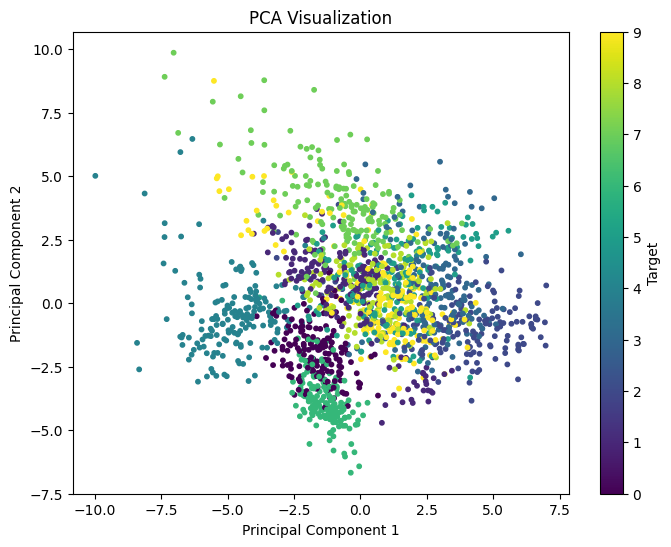

Variance explained by components: [0.12033916 0.09561054]


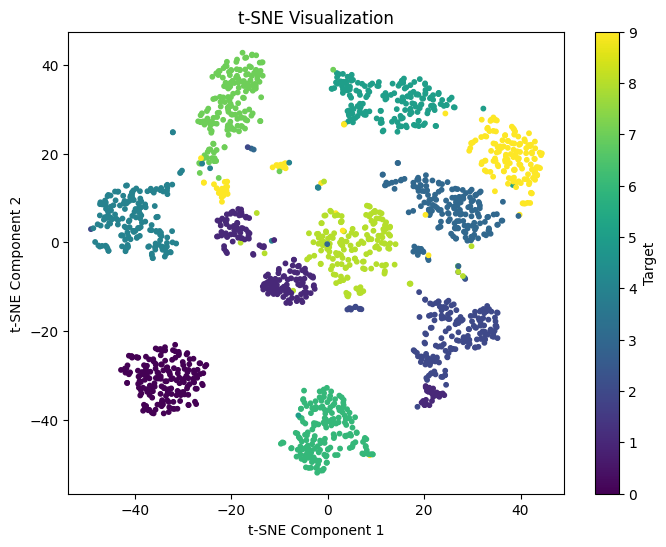

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'], cmap='viridis', s=10)
plt.colorbar(label='Target')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Interpret variance explained by components
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by components: {explained_variance}")

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

# Visualize t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=df['target'], cmap='viridis', s=10)
plt.colorbar(label='Target')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Optimal number of clusters for K-Means: 8


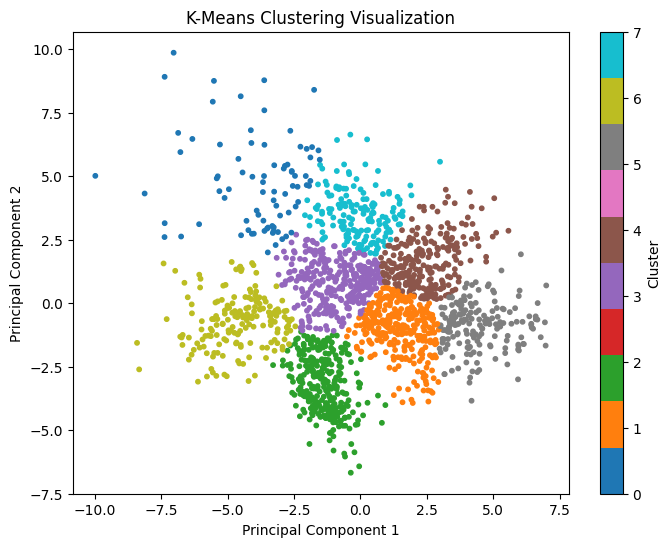

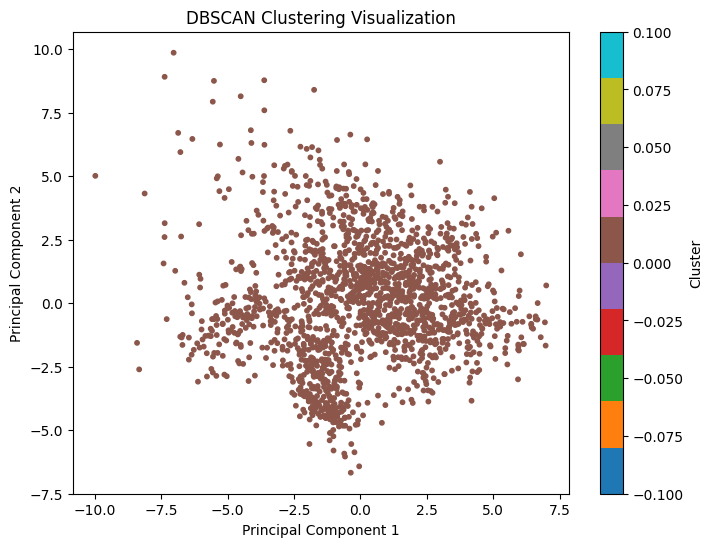

DBSCAN did not form valid clusters.


In [9]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Apply K-Means clustering
kmeans_scores = []
kmeans_range = range(2, 11)  # Test cluster counts from 2 to 10
for k in kmeans_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(pca_data)
    score = silhouette_score(pca_data, kmeans_labels)
    kmeans_scores.append(score)

# Find optimal cluster count using Elbow Method or Silhouette Score
optimal_k = kmeans_range[np.argmax(kmeans_scores)]
print(f"Optimal number of clusters for K-Means: {optimal_k}")

# Fit K-Means with optimal cluster count
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

# Visualize K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='tab10', s=10)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan_labels = dbscan.fit_predict(pca_data)

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='tab10', s=10)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Evaluate DBSCAN clustering (excluding noise points)
if len(set(dbscan_labels)) > 1:  # Ensure there are clusters other than noise
    valid_labels = dbscan_labels[dbscan_labels != -1]
    valid_data = pca_data[dbscan_labels != -1]
    dbscan_score = silhouette_score(valid_data, valid_labels)
    print(f"Silhouette Score for DBSCAN: {dbscan_score}")
else:
    print("DBSCAN did not form valid clusters.")

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Analyze K-Means clustering
kmeans_silhouette = silhouette_score(pca_data, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(pca_data, kmeans_labels)

print(f"K-Means Clustering:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Davies-Bouldin Index: {kmeans_davies_bouldin}")

# Analyze DBSCAN clustering 
if len(set(dbscan_labels)) > 1: 
    valid_labels = dbscan_labels[dbscan_labels != -1]
    valid_data = pca_data[dbscan_labels != -1]
    dbscan_silhouette = silhouette_score(valid_data, valid_labels)
    dbscan_davies_bouldin = davies_bouldin_score(valid_data, valid_labels)

    print(f"\nDBSCAN Clustering:")
    print(f"Silhouette Score: {dbscan_silhouette}")
    print(f"Davies-Bouldin Index: {dbscan_davies_bouldin}")
else:
    print("\nDBSCAN Clustering:")
    print("DBSCAN did not form valid clusters.")

# Compare clustering results
print("\nComparison:")
print("Silhouette Score: Higher values indicate better-defined clusters.")
print("Davies-Bouldin Index: Lower values indicate better-defined clusters.")
print("K-Means generally performs better for datasets with spherical clusters, while DBSCAN is better for arbitrary-shaped clusters.")

K-Means Clustering:
Silhouette Score: 0.39228299544727846
Davies-Bouldin Index: 0.7873244438807552

DBSCAN Clustering:
DBSCAN did not form valid clusters.

Comparison:
Silhouette Score: Higher values indicate better-defined clusters.
Davies-Bouldin Index: Lower values indicate better-defined clusters.
K-Means generally performs better for datasets with spherical clusters, while DBSCAN is better for arbitrary-shaped clusters.
